In [77]:
import pandas as pd
import pyarrow
import geopandas
import matplotlib.pyplot as plt
import raster2xyz

In [78]:
# from parquet to csv
file = pd.read_parquet('../../finalproj_data/input_data/newdata_v2.parquet', engine = 'pyarrow')

In [79]:
file = file.loc[:,['lat', 'lon', 'label']]

In [80]:

file.head()

,lat,lon,label
0,-4.98565,106.360530,water
1,-4.98565,106.405485,water
2,-4.98565,106.450441,water
3,-4.98565,106.495396,water
4,-4.98565,106.540352,water


In [81]:
gdf = geopandas.GeoDataFrame(file, geometry=geopandas.points_from_xy(file.lon, file.lat))

In [82]:
gdf.head()

,lat,lon,label,geometry
0,-4.98565,106.360530,water,POINT (106.36053 -4.98565)
1,-4.98565,106.405485,water,POINT (106.40549 -4.98565)
2,-4.98565,106.450441,water,POINT (106.45044 -4.98565)
3,-4.98565,106.495396,water,POINT (106.49540 -4.98565)
4,-4.98565,106.540352,water,POINT (106.54035 -4.98565)


In [83]:
# Change to Numeric
gdf.loc[(gdf['label']=='water'), 'label'] = 0
gdf.loc[(gdf['label']=='land'), 'label'] = 1
gdf.loc[(gdf['label']=='burned'), 'label'] = 2
gdf.loc[(gdf['label']=='fwi_moderate'), 'label'] = 3
gdf.loc[(gdf['label']=='fwi_high'), 'label'] = 4
gdf.loc[(gdf['label']=='active_fire'), 'label'] = 5

In [84]:
gdf['label'].value_counts()

0    649240
2    369925
4     11823
1      2463
3       732
5       193
Name: label, dtype: int64

### Plot

In [1]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
aus = world[world['name']=='Australia']

NameError: name 'geopandas' is not defined

In [49]:
aus = world[world['name']=='Australia']

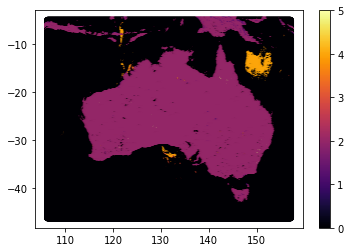

In [85]:
gdf.plot(['label'], cmap = 'inferno', legend = True)

In [46]:
gdf.to_file('../../finalproj_data/input_data/gdf.shp')

In [47]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# aus = world[world['name'] == 'Australia']
# aus.plot()
# gdf.plot(column='label')